(content:chapter:differentialequations)=

# Alternating Current: Differential Equation Approach

```{include} includes/latex_imports.md

```

In [1]:
import schemdraw.elements as elm
import schemdraw
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


## Analysis Methods and Theorems with Alternating Current

### Voltage Divider

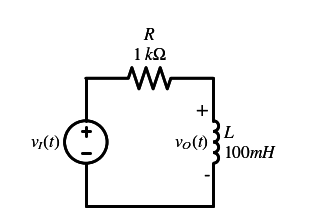

In [2]:
with schemdraw.Drawing(file='voltage-divider-resistor-inductor.svg') as d:
    d += elm.SourceV().label('$v_I(t)$').up()
    d += elm.Resistor().label('$R$\n$1~k\Omega$').right()
    d += elm.Inductor().label('$L$\n$100 mH$',loc='bot').down().label(['+', '$v_O(t)$','-'])
    d += elm.Line().left()

```{index} Voltage Divider

```

`````{admonition} Example


```{figure} voltage-divider-resistor-inductor.svg
---
height: 300px
name: voltage-divider-resistor-inductor
---
```

Find v$_O$(t) given that $v_I(t)=4 \cos(10000t+45^\circ)$ V

````{admonition} Solution using differential equations
:class: tip, dropdown
First remember that

$$v_O(t) = L \frac{d~i(t)}{dt}$$

and that

$$ v_R(t) = R i(t).$$

Then, from Kirchhoff's Voltage Law:

$$ v_I(t) = v_R(t) + v_O(t)$$

or

$$ 4 \cos(10000t+45^\circ) = R i(t) + L \frac{d~i(t)}{dt}$$

Now, we need to solve this linear, first order differential equation ({cite:ts}`paul_dawkins_math_notes`).

```{note} Dawkins' approach
:class: dropdown

{cite:ts}`paul_dawkins_math_notes` says to:

- Put the differential equation in the correct initial form.

$$ \frac{d~i(t)}{dt} + p(t) i(t) = g(t) $$

- Find the integrating factor $\mu(t)$ using

$$ \mu(t) = e^{\int p(t) dt} $$

- Multiply everything in the differential equation by $\mu(t)$ and verify that the left side becomes the product rule $(\mu(t)y(t))^′$ and write it as such.

- Integrate both sides, make sure you properly deal with the constant of integration.

- Solve for the solution $i(t)$.

```

To get the equation into the correct form, just swap sides and divide both sides by $L$:

$$  \frac{R}{L} i(t) +  \frac{d~i(t)}{dt} = \frac{4}{L} \cos(10000t+45^\circ)$$

Then we can see that $p(t) = \frac{R}{L}$ so that

$$ \mu(t) = e^{\frac{R}{L} t} $$

Then

\begin{align*}
\mu(t)\frac{R}{L} i(t) +  \mu(t)\frac{d~i(t)}{dt} &= \mu(t)\frac{4}{L} \cos(10000t+45^\circ)\\
(\mu(t) i(t))' &= \mu(t)\frac{4}{L} \cos(10000t+45^\circ)
\end{align*}

and integrating both sides we get

\begin{align*}
\int (e^{\frac{R}{L} t} i(t))' dt &= \int e^{\frac{R}{L} t}\frac{4}{L} \cos(10000t+45^\circ) dt\\
e^{\frac{R}{L} t} i(t) + k &= \frac{4 e^{\frac{R}{L} t}}{10^8 L^2 + R^2}  \big [  10000 L \sin(10000t+45^\circ)   \\
&+ R \cos(10000t+45^\circ)  \big ] + c
\end{align*}

so that

\begin{align*}
i(t) &= \frac{4}{10^8 L^2 + R^2}  \big [ 10000 L \sin(10000t+45^\circ) \\
&+ R  \cos(10000t+45^\circ)  \big ] \\
& + \kappa e^{-\frac{R}{L} t}
\end{align*}

Substituting $L= 0.1$ and $R = 1000$ we get

\begin{align*}
i(t) &= \frac{4}{10^6 + 10^6} \big [ 1000 \sin(10000t+45^\circ)\\
&+ 1000 \cos(10000t+45^\circ) \big ] \\
&+ \kappa e^{-\frac{R}{L} t} \\
&= \frac{4}{10^6 + 10^6} 1000 \sqrt{2} \cos(10000 t) + \kappa e^{-\frac{R}{L} t}
\end{align*}

And after a long time ($t > 5 \frac{L}{R} = 500 \mu s$)

$$ i(t) = \frac{2 \sqrt{2}}{1000} \cos(10000 t)  $$

So

\begin{align*}
v_O(t) &= L \frac{d~i(t)}{dt} \\
&=  0.1 \times ( - 10000 \times \frac{2 \sqrt{2}}{1000}  \sin(10000t)  )\\
&= -  2 \sqrt{2} \sin(10000t) \\
&= 2 \sqrt{2} \cos(10000 t + 90^\circ)
\end{align*}

````
`````

### Current Divider

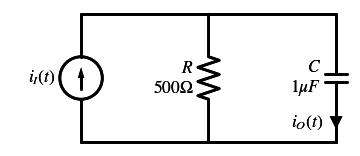

In [3]:
with schemdraw.Drawing(file='current-divider-resistor-capacitor.svg') as d:
    d += elm.SourceI().label('$i_I(t)$').up()
    d += elm.Line().right()
    d.push()
    d += elm.Line().right()
    d += (C:= elm.Capacitor().down().label('$C$\n$1 \mu F$'))
    d += elm.Line().left().length(6)
    d.pop()
    d += elm.Resistor().down().label('$R$\n$500 \Omega$')
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(C.end).label('$i_O(t)$')

`````{admonition} Example


```{figure} current-divider-resistor-capacitor.svg
---
height: 300px
name: current-divider-resistor-capacitor
---
```

Find $i_O(t)$ given that $i_I(t)=400 \cos(1000t-30^\circ)$ mA.

````{admonition} Solution using differential equations
:class: tip, dropdown

Here

$$ i_O(t) = C \frac{d~v_C(t)}{dt} $$

and applying Kirchhoff's Current Law (KCL) to the top node we get

$$ i_I(t) = v_R(t) / R  + C \frac{d~v_C(t)}{dt} $$

Rearranging this into Dawkins' preferred format, we get

$$ \frac{1}{RC} v_R(t) + \frac{d~v_C(t)}{dt} = 400 \cos(1000t-30^\circ) $$

and noting that $v_R(t) = v_C(t)$

$$ \frac{1}{RC} v(t) + \frac{d~v(t)}{dt} = 400 \cos(1000t-30^\circ) $$

For this example, our integrating factor $\mu(t)$ is now

$$ \mu(t) = e^{\frac{t}{RC}} $$

and multiplying both sides of our differential equation by this factor yields

$$ \frac{d}{dt} (\mu(t) v(t)) = \mu(t) 400 \cos(1000t-30^\circ ).$$

We can now integrate this as we did in the voltage divider example to give

\begin{align*}
\int \frac{d}{dt}  (e^{\frac{t}{RC}} v(t)) dt &=  \int e^{\frac{t}{RC}} 400 \cos(1000t-30^\circ) dt \\
\int \frac{d}{dt} (e^{\frac{t}{5 \times 10^{-4}}} v(t)) dt &=  \int e^{\frac{t}{5 \times 10^{-4}}} 400 \cos(1000t-30^\circ) dt \\
e^{2000 t} v(t) + c &= 0.178885 e^{2000 t} \sin(1000 t + 33.4^\circ ) + k\\
v(t) &= 0.178885 \sin(1000 t + 33.4^\circ ) + \kappa e^{-2000 t}
\end{align*}

And after a long time ($t > 5 RC = 2.5 ms$):

$$
v(t) = 0.178885 \sin(1000 t + 33.4^\circ )
$$

Then

\begin{align*}
i_O(t) &= C \frac{d~v(t)}{dt} \\
&=  1 \times 10^{-6} \times (  178.885 \cos(1000 t + 33.4^\circ) )\\
&= 178.885  \cos(1000 t + 33.4^\circ) \mu A
\end{align*}

````


`````

### Mesh Analysis

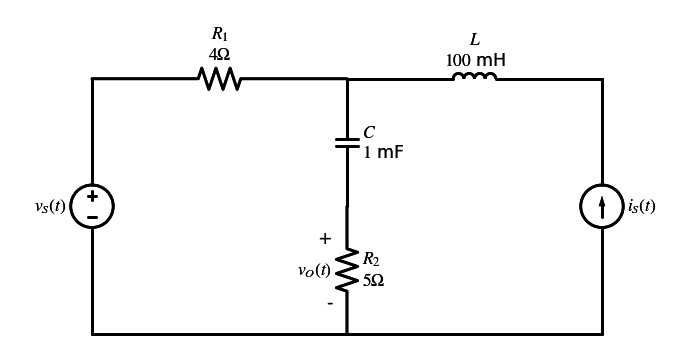

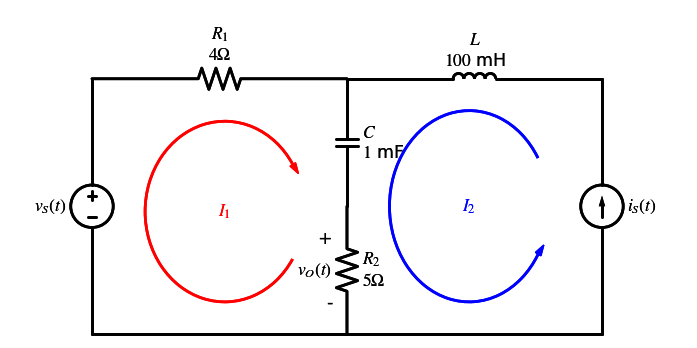

In [4]:
with schemdraw.Drawing(file='mesh-analysis-differential-equations.svg') as d:
    d += (VS := elm.SourceV().up().label('$v_S(t)$').length(6))
    d += (R1 := elm.Resistor().right().label('$R_1$\n$4 \Omega$').length(6))
    d.push()
    d += (L := elm.Inductor().right().label('$L$\n$100$ mH').length(6))
    d += (IS := elm.SourceI().down().label('$i_S(t)$', loc='bot').length(6).reverse())
    d += (LN := elm.Line().length(12).left())
    d.pop()
    d += (C := elm.Capacitor().down().label('$C$\n$1$ mF', loc='bot'))
    d += (R2 := elm.Resistor().down().label(['+', '$v_O(t)$', '-']).label('$R_2$\n$5 \Omega$', loc='bot'))

with schemdraw.Drawing(file='mesh-analysis-differential-equations-meshes.svg') as d:
    d += (VS := elm.SourceV().up().label('$v_S(t)$').length(6))
    d += (R1 := elm.Resistor().right().label('$R_1$\n$4 \Omega$').length(6))
    d.push()
    d += (L := elm.Inductor().right().label('$L$\n$100$ mH').length(6))
    d += (IS := elm.SourceI().down().label('$i_S(t)$', loc='bot').length(6).reverse())
    d += (LN := elm.Line().length(12).left())
    d.pop()
    d += (C := elm.Capacitor().down().label('$C$\n$1$ mF', loc='bot'))
    d += (R2 := elm.Resistor().down().label(['+', '$v_O(t)$', '-']).label('$R_2$\n$5 \Omega$', loc='bot'))
    d += elm.LoopCurrent([R1,C,LN,VS], pad = 0.75).label('$I_1$').color('red')
    d += elm.LoopCurrent([L,IS,LN,C], pad = 0.75, direction = 'ccw').label('$I_2$').color('blue')

```{index} Mesh Analysis

```

`````{admonition} Example

Solve for $v_O(t)$ using mesh analysis where

$$
v_S(t) = 12 \cos( 100 t) \mbox{V}
$$

and

$$
i_S(t) = 4 \cos( 100 t + 90^\circ) \mbox{A}.
$$

```{figure} mesh-analysis-differential-equations.svg
---
height: 400px
name: mesh-analysis-differential-equations
---
```

````{admonition} Solution using differential equations
:class: tip, dropdown

First, let's define the mesh currents $I_1$ and $I_2$.

```{figure} mesh-analysis-differential-equations-meshes.svg
---
height: 400px
name: mesh-analysis-differential-equations-meshes
---
```

Then, the KVL equation for the $I_1$ mesh is

\begin{align*}
-v_s(t)  + v_{R1}(t) + v_C(t) + v_{R2}(t) &=& 0\\
12\cos( 100 t) + I_1(t) R_1 + \ldots \\
\frac{1}{C} \int I_1(t) dt + (I_1(t) - I_2(t)) R_2 &=& 0\\
12\cos( 100 t) + 4 I_1(t) + \ldots \\
1000 \int I_1(t) dt + 5(I_1(t) - I_2(t)) &=& 0
\end{align*}

yielding

```{math}
:label: loop_1_mesh
9 I_1(t) + 1000 \int I_1(t) dt - 5 I_2(t)  = -12\cos( 100 t).
```

Looking at the $I_2$ mesh, we see that there is a current source and that $I_2$ is in the same direction as $i_S$.

This simplifies the analysis because it means

$$
I_2(t) = i_S(t) = 4 \cos( 100 t + 90^\circ) \mbox{A}.
$$

Substituting this into {eq}`loop_1_mesh` gives

\begin{align*}
9 I_1(t) + 1000 \int I_1(t) dt - 20 \cos( 100 t + 90^\circ)  &=&\\ -12\cos( 100 t)\\
9 I_1(t) + 1000 \int I_1(t) dt   &=&\\ -12\cos( 100 t) + 20 \cos( 100 t + 90^\circ)\\
9 I_1(t) + 1000 \int I_1(t) dt &=&\\ -4 \sqrt(34) \sin(100 t + \tan^{-1}(3/5))\\
9 I_1(t) + 1000 \int I_1(t) dt &=&\\ -4 \sqrt(34) \sin(100 t + 30.96^\circ)
\end{align*}

Then, to turn this into a differential equation, we can differentiate both sides with respect to $t$ to get:

\begin{align*}
9 \frac{d}{dt} I_1(t) + 1000 I_1(t) = -400 \sqrt{34} \cos(100 t + 30.96^\circ)\\
0.009 \frac{d}{dt} I_1(t) +  I_1(t) = -0.4 \sqrt{34} \cos(100 t + 30.96^\circ)\\
\end{align*}

Again using our integrating factor $\mu(t) = e^{t/0.009}$, we get

$$
\frac{d}{dt} (\mu(t) I_1(t)) = -400 \sqrt{34} \cos(100 t + 30.96^\circ) \mu(t).
$$

Integrating both sides with respect to $t$ gives

\begin{align*}
e^{t/0.009} I_1(t) + c &=& -0.4 \sqrt{34} \int e^{t/0.009} \cos(100 t + 30.96^\circ) dt\\
e^{t/0.009} I_1(t) + c &=& -0.4 \sqrt{34} \left (0.009 e^{t/0.009} \cos(100 t + 30.96^\circ)\right. \\
&& + \left . \displaystyle\frac{0.9 \sin(100 t + 30.96^\circ)}{(10000 (0.009)^2 + 1)} \right)
\end{align*}

Rearranging, we get

\begin{align*}
I_1(t) &=& -0.4 \sqrt{34} \biggl( 0.009 \cos(100 t + 30.96^\circ) \\
&& +  \left(\displaystyle\frac{0.9 \sin(100 t + 30.96^\circ)}{(10000 (0.009)^2 + 1)} - c \right)e^{-t/0.009} \biggr )
\end{align*}

and then after more than $t \gg 5 \times 0.009$ we get

\begin{align*}
I_1(t) &=& -0.4 \sqrt{34} 0.009 \cos(100 t + 30.96^\circ)\\
 &=& -20.99 \cos(100 t + 30.96^\circ) \mbox{A.}
\end{align*}

Then

\begin{align*}
v_O(t) &=& (I_1(t) + I_2(t)) R_2 \\
&=& -20.99 \cos(100 t + 30.96^\circ)  \\
&& + 20 \cos( 100 t + 90^\circ) \\
&=& 20.215 \cos(100 t + 152.92^\circ) \mbox{V.}
\end{align*}
````
`````

### Nodal Analysis

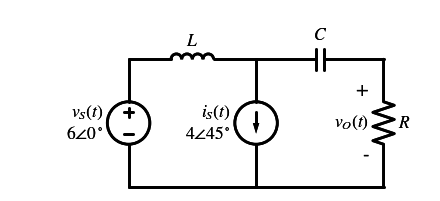

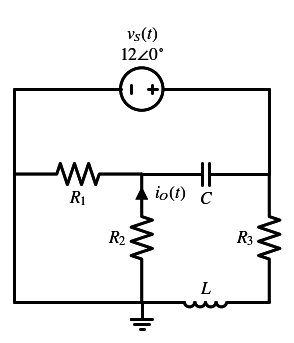

In [5]:
with schemdraw.Drawing(file='nodal-analysis-differential-equations.svg') as d:
    d += elm.SourceV().up().label('$v_S(t)$\n$6 \\angle 0^\circ$')
    d += elm.Inductor().right().label('$L$')
    d.push()
    d += elm.Capacitor().right().label('$C$')
    d += elm.Resistor().down().label(['+', '$v_O(t)$', '-']).label('$R$', loc='bot')
    d += elm.Line().length(6).left()
    d.pop()
    d += elm.SourceI().down().label('$i_S(t)$\n$4 \\angle{45^\circ}$')

with schemdraw.Drawing(file='nodal-analysis-differential-equations-2.svg') as d:
    d += elm.Line().length(3).up()
    d += elm.Line().length(2).up()
    d += elm.SourceV().right().label('$v_S(t)$\n$12 \\angle 0^\circ$').length(6)
    d += elm.Line().length(2).down()
    d.push()
    d += elm.Resistor().label('$R_3$').down()
    d += elm.Inductor().left().label('$L$')
    d.push()
    d.push()
    d += elm.Ground().right()
    d.pop()
    d += (R2 := elm.Resistor().up().label('$R_2$'))
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(R2.end).label('$i_O(t)$', loc='bot')
    d.pop()
    d += elm.Line().left()
    d.pop()
    d += elm.Capacitor().left().label('$C$', loc='bot')
    d += elm.Resistor().left().label('$R_1$', loc='bot')


````{admonition} Example


```{figure} nodal-analysis-differential-equations.svg
---
height: 300px
name: nodal-analysis-differential-equations
---
```


````

````{admonition} Example


```{figure} nodal-analysis-differential-equations-2.svg
---
height: 600px
name: nodal-analysis-differential-equations-2
---
```


````

## References

```{bibliography} ./references.bib
:filter: docname in docnames
```